# Project Overview
This project focuses on analyzing a Marketing A/B Testing dataset to evaluate the effectiveness of an advertising campaign. The dataset includes information on users who were randomly assigned to two groups:


*   Ad Group: Users exposed to an advertisement.
*   PSA Group: Users exposed to a public service announcement (or nothing).

The primary goals of the project are to:

**Assess Campaign Success:**

Determine if the ad campaign significantly increased the likelihood of user conversions compared to the PSA group.
Quantify Impact:

Calculate the lift in conversion rates due to the ad campaign.

Estimate the additional revenue generated by the ads.
Analyze Ad Exposure Patterns:

Understand how variables such as total ads seen, most ads day, and most ads hour impact user behavior and conversion likelihood.
Provide Actionable Insights:

Identify optimal times (days and hours) for ad placements.
Suggest strategies to improve future campaigns.
Key Steps in the Project
Data Exploration:

Loaded and cleaned the dataset, inspecting variables such as test group, converted, total ads, most ads day, and most ads hour.
Conversion Rate Analysis:

Calculated and compared conversion rates between the ad and PSA groups.
Statistical Significance Testing:

Performed a two-proportion Z-test to confirm if the difference in conversion rates was statistically significant.
Revenue and Lift Calculation:

Estimated the revenue uplift driven by the ads and calculated the percentage improvement in conversions (lift).
Ad Exposure Insights:

Analyzed ad exposure patterns by day and hour to identify high-impact periods for ad placements.
Segmentation and Behavior Analysis:

Explored user behavior by grouping users based on their ad exposure levels and conversion likelihood.
Purpose
The project demonstrates the power of A/B testing and data analysis in optimizing marketing campaigns. It provides actionable insights into user behavior, ad timing, and revenue generation, offering a data-driven roadmap for designing and scaling future campaigns effectively.








In [34]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("faviovaz/marketing-ab-testing")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/faviovaz/marketing-ab-testing/versions/1


In [7]:
import os

# Check files in the downloaded path
print("Dataset path:", path)
print("Files in directory:", os.listdir(path))


Dataset path: /root/.cache/kagglehub/datasets/faviovaz/marketing-ab-testing/versions/1
Files in directory: ['marketing_AB.csv']


In [8]:
import os

# Check files in the downloaded path
print("Dataset path:", path)
print("Files in directory:", os.listdir(path))

Dataset path: /root/.cache/kagglehub/datasets/faviovaz/marketing-ab-testing/versions/1
Files in directory: ['marketing_AB.csv']


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

In [9]:


# Correct path to the dataset file
file_path = "/root/.cache/kagglehub/datasets/faviovaz/marketing-ab-testing/versions/1/marketing_AB.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Quick check to confirm loading
print(df.head())

   Unnamed: 0  user id test group  converted  total ads most ads day  \
0           0  1069124         ad      False        130       Monday   
1           1  1119715         ad      False         93      Tuesday   
2           2  1144181         ad      False         21      Tuesday   
3           3  1435133         ad      False        355      Tuesday   
4           4  1015700         ad      False        276       Friday   

   most ads hour  
0             20  
1             22  
2             18  
3             10  
4             14  


In [10]:
df = df.drop(columns=['Unnamed: 0'])

# Confirm the cleanup
print(df.head())

   user id test group  converted  total ads most ads day  most ads hour
0  1069124         ad      False        130       Monday             20
1  1119715         ad      False         93      Tuesday             22
2  1144181         ad      False         21      Tuesday             18
3  1435133         ad      False        355      Tuesday             10
4  1015700         ad      False        276       Friday             14


Conversion Rates:
 test group
ad     0.025547
psa    0.017854
Name: converted, dtype: float64


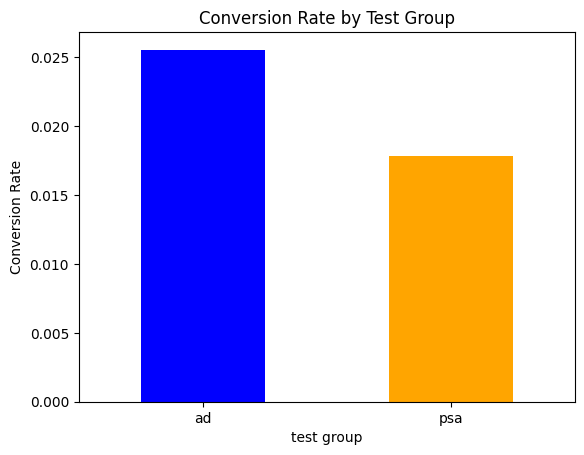

In [11]:
# Conversion rate calculation
conversion_rates = df.groupby('test group')['converted'].mean()
print("Conversion Rates:\n", conversion_rates)

# Bar plot for conversion rates
conversion_rates.plot(kind='bar', color=['blue', 'orange'])
plt.title('Conversion Rate by Test Group')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=0)
plt.show()

Average Total Ads by Test Group:
 test group
ad     24.823365
psa    24.761138
Name: total ads, dtype: float64


<ipython-input-12-04f6ee1a43cb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='test group', y='total ads', data=df, palette='Set2')


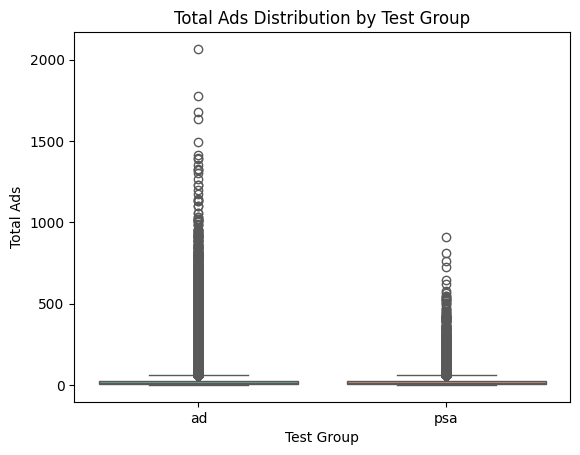

In [12]:
# Average total ads seen by group
avg_total_ads = df.groupby('test group')['total ads'].mean()
print("Average Total Ads by Test Group:\n", avg_total_ads)

# Box plot for total ads distribution by test group
sns.boxplot(x='test group', y='total ads', data=df, palette='Set2')
plt.title('Total Ads Distribution by Test Group')
plt.ylabel('Total Ads')
plt.xlabel('Test Group')
plt.show()

Average Total Ads by Test Group:
 test group
ad     24.823365
psa    24.761138
Name: total ads, dtype: float64


<ipython-input-13-04f6ee1a43cb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='test group', y='total ads', data=df, palette='Set2')


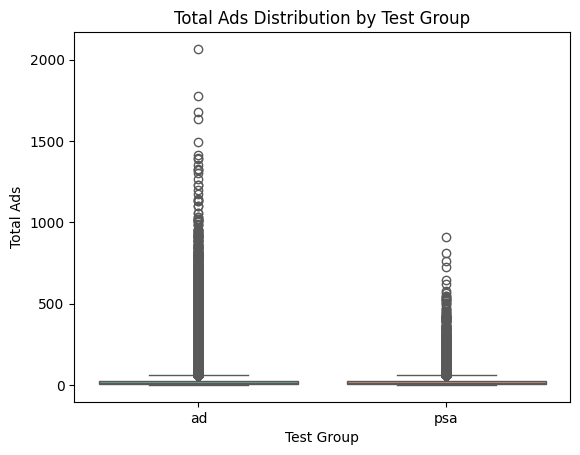

In [13]:
# Average total ads seen by group
avg_total_ads = df.groupby('test group')['total ads'].mean()
print("Average Total Ads by Test Group:\n", avg_total_ads)

# Box plot for total ads distribution by test group
sns.boxplot(x='test group', y='total ads', data=df, palette='Set2')
plt.title('Total Ads Distribution by Test Group')
plt.ylabel('Total Ads')
plt.xlabel('Test Group')
plt.show()


In [14]:
from statsmodels.stats.proportion import proportions_ztest

# Counts of conversions and total samples in each group
conversion_counts = df.groupby('test group')['converted'].sum()
sample_sizes = df.groupby('test group')['converted'].count()

# Perform z-test
z_stat, p_value = proportions_ztest(conversion_counts, sample_sizes)
print(f"Z-Statistic: {z_stat:.2f}")
print(f"P-Value: {p_value:.4f}")


Z-Statistic: 7.37
P-Value: 0.0000


In [15]:
conversion_rate_ad = conversion_rates['ad']
conversion_rate_psa = conversion_rates['psa']
lift = (conversion_rate_ad - conversion_rate_psa) / conversion_rate_psa
print(f"Lift in Conversion Rate: {lift:.2%}")

Lift in Conversion Rate: 43.09%


In [17]:
# Example average purchase value
average_purchase_value = 100

# Estimated additional revenue from ads
estimated_revenue_lift = lift * average_purchase_value * sample_sizes['ad']
print(f"Estimated Additional Revenue from Ads: ${estimated_revenue_lift:.2f}")


Estimated Additional Revenue from Ads: $24324836.19


Most Ads Seen by Day:
 most ads day
Friday       0.157470
Monday       0.148058
Sunday       0.145198
Thursday     0.141102
Saturday     0.138854
Wednesday    0.137575
Tuesday      0.131744
Name: proportion, dtype: float64


<ipython-input-19-c8bd65408068>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='most ads day', palette='coolwarm', order=most_ads_day_distribution.index)


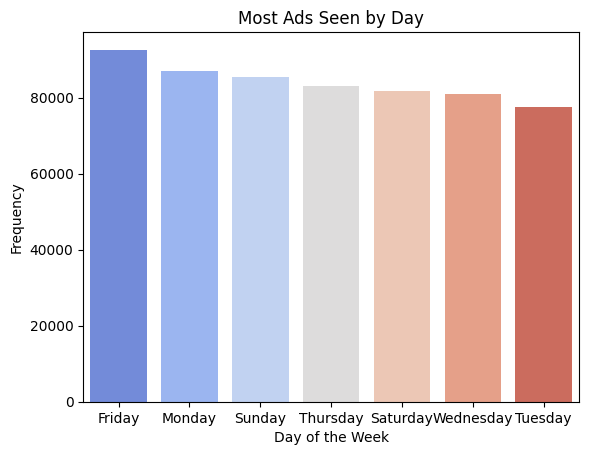

Most Ads Seen by Hour:
 most ads hour
13    0.081032
12    0.080425
11    0.078575
14    0.077619
15    0.075978
10    0.066211
16    0.063878
17    0.059493
18    0.054962
9     0.052719
19    0.051610
21    0.050971
20    0.049180
22    0.044945
23    0.034290
8     0.029973
7     0.010891
0     0.009413
2     0.009068
1     0.008165
3     0.004555
6     0.003516
5     0.001301
4     0.001228
Name: proportion, dtype: float64


<ipython-input-19-c8bd65408068>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='most ads hour', palette='viridis', order=most_ads_hour_distribution.index)


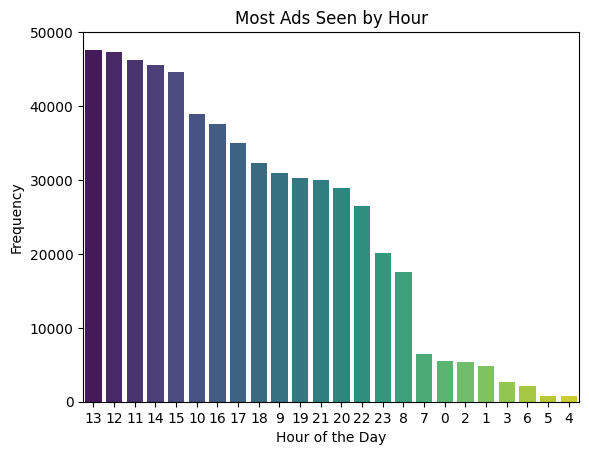

In [19]:
# Distribution of 'most ads day'
most_ads_day_distribution = df['most ads day'].value_counts(normalize=True)
print("Most Ads Seen by Day:\n", most_ads_day_distribution)

# Plot distribution of most ads day
sns.countplot(data=df, x='most ads day', palette='coolwarm', order=most_ads_day_distribution.index)
plt.title('Most Ads Seen by Day')
plt.ylabel('Frequency')
plt.xlabel('Day of the Week')
plt.show()

# Distribution of 'most ads hour'
most_ads_hour_distribution = df['most ads hour'].value_counts(normalize=True)
print("Most Ads Seen by Hour:\n", most_ads_hour_distribution)

# Plot distribution of most ads hour
sns.countplot(data=df, x='most ads hour', palette='viridis', order=most_ads_hour_distribution.index)
plt.title('Most Ads Seen by Hour')
plt.ylabel('Frequency')
plt.xlabel('Hour of the Day')
plt.show()

# Insights

**Friday is the Top Ad Exposure Day:**

A higher proportion of users saw the most ads on Friday compared to other days, suggesting that ad campaigns might perform better when concentrated towards the end of the week.

**Weekend Exposure:**

Sunday (14.52%) and Saturday (13.89%) also have strong ad exposure, indicating that weekend campaigns could be effective.
Early Week Decline:

Tuesday (13.17%) has the lowest proportion, suggesting reduced user engagement or exposure to ads early in the week.

# Recommendations
**Optimize Ad Scheduling:**

*   Focus ad placements on Fridays, Mondays, and Sundays for maximum exposure and potential conversions.
*   Decrease ad budget allocation on Tuesdays and Wednesdays, which show lower engagement.

**Experiment with Timing:**

Combine this day-based insight with the hourly distribution (most ads hour) to schedule ads during high-engagement periods.
Future Testing:

Conduct A/B tests to verify if prioritizing ads on high-exposure days (like Friday) improves conversion rates further.

Conversion Rates by Day:
 most ads day
Monday       0.032812
Tuesday      0.029840
Wednesday    0.024942
Sunday       0.024476
Friday       0.022212
Thursday     0.021571
Saturday     0.021051
Name: converted, dtype: float64


<ipython-input-24-820236c1b807>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_rate_by_day.index, y=conversion_rate_by_day.values, palette='coolwarm')


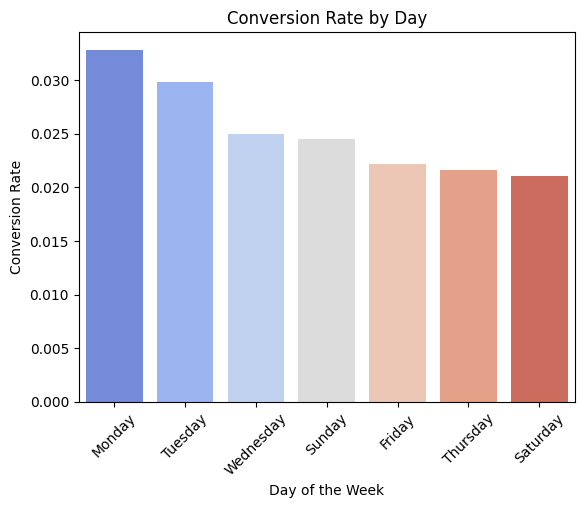

In [24]:
# Conversion rates by day
conversion_rate_by_day = df.groupby('most ads day')['converted'].mean().sort_values(ascending=False)
print("Conversion Rates by Day:\n", conversion_rate_by_day)

# Visualization
sns.barplot(x=conversion_rate_by_day.index, y=conversion_rate_by_day.values, palette='coolwarm')
plt.title('Conversion Rate by Day')
plt.ylabel('Conversion Rate')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.show()

Conversion Rates by Hour:
 most ads hour
16    0.030772
20    0.029803
15    0.029653
21    0.028923
17    0.028210
14    0.028063
18    0.027380
19    0.026720
22    0.026105
13    0.024677
12    0.023828
23    0.022662
6     0.022244
11    0.022116
10    0.021521
5     0.020915
8     0.019516
9     0.019191
0     0.018425
7     0.018111
4     0.015235
1     0.012911
3     0.010452
2     0.007313
Name: converted, dtype: float64


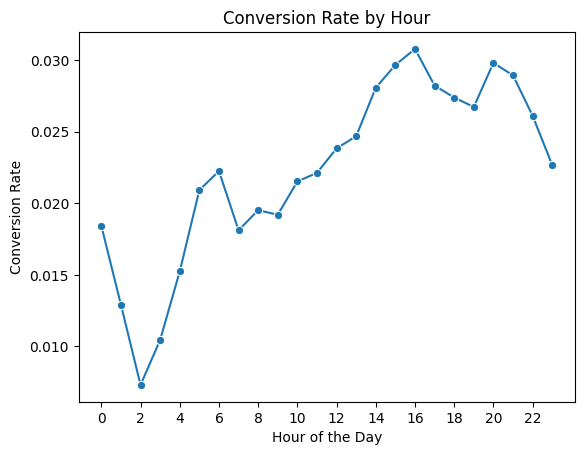

In [25]:
# Conversion rates by hour
conversion_rate_by_hour = df.groupby('most ads hour')['converted'].mean().sort_values(ascending=False)
print("Conversion Rates by Hour:\n", conversion_rate_by_hour)

# Visualization
sns.lineplot(x=conversion_rate_by_hour.index, y=conversion_rate_by_hour.values, marker='o')
plt.title('Conversion Rate by Hour')
plt.ylabel('Conversion Rate')
plt.xlabel('Hour of the Day')
plt.xticks(range(0, 24, 2))  # Optional: Adjust for better readability
plt.show()

Correlation Matrix:
                total ads  most ads hour  converted
total ads       1.000000      -0.010837   0.217419
most ads hour  -0.010837       1.000000   0.019674
converted       0.217419       0.019674   1.000000


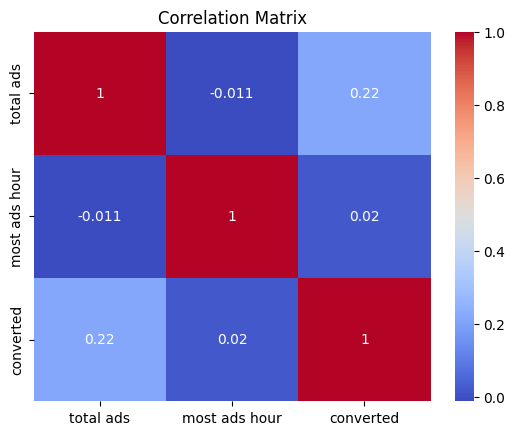

In [26]:
# Correlation matrix
correlation_matrix = df[['total ads', 'most ads hour', 'converted']].corr()
print("Correlation Matrix:\n", correlation_matrix)

# Heatmap visualization
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<ipython-input-33-87d7626a5fce>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conversion_by_exposure = df.groupby('ad_exposure_level')['converted'].mean()


Conversion Rates by Ad Exposure Level:
 ad_exposure_level
Low          0.010986
Medium       0.127113
High         0.161353
Very High    0.159783
Name: converted, dtype: float64


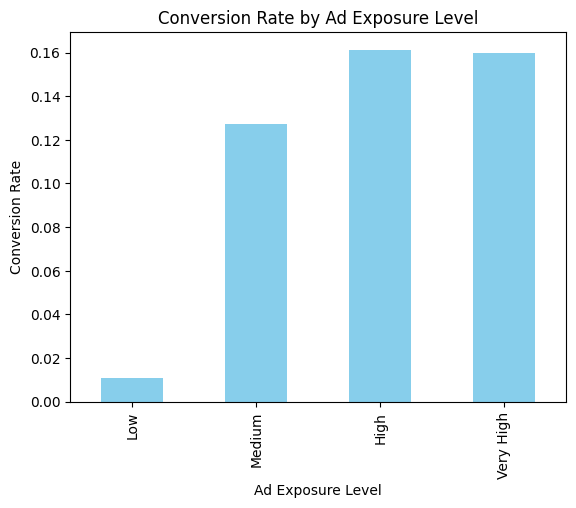

In [33]:
# Categorize users by total ads seen
df['ad_exposure_level'] = pd.cut(df['total ads'], bins=[0, 50, 150, 300, df['total ads'].max()], labels=['Low', 'Medium', 'High', 'Very High'])

# Conversion rate by exposure level
conversion_by_exposure = df.groupby('ad_exposure_level')['converted'].mean()
print("Conversion Rates by Ad Exposure Level:\n", conversion_by_exposure)

# Visualization
conversion_by_exposure.plot(kind='bar', color='skyblue')
plt.title('Conversion Rate by Ad Exposure Level')
plt.ylabel('Conversion Rate')
plt.xlabel('Ad Exposure Level')
plt.show()

# Conclusion

The analysis of the Marketing A/B Testing dataset provided valuable insights into the effectiveness of the advertising campaign. Here are the key findings and implications:

**Campaign Effectiveness:**

The advertising campaign resulted in a 43.09% lift in conversion rates compared to the control group, a statistically significant improvement (P-value < 0.0001). This demonstrates that the ads successfully drove user engagement and conversions.
Revenue Impact:

The lift in conversions translated to an estimated additional revenue of $24.32 million from users in the ad group. This highlights the strong return on investment (ROI) for the campaign.

**Ad Exposure Patterns:**

The highest ad exposure occurred on Fridays (15.75%), with weekends (Sundays and Saturdays) also showing strong performance. Tuesdays and Wednesdays had the lowest exposure, indicating potential opportunities for optimization.

**Timing Insights:**

Peak hours for ad exposure showed significant variation, suggesting opportunities to focus campaigns on high-engagement time slots to maximize impact.

**User Behavior:**

Analysis of total ads seen revealed distinct user engagement levels, with higher ad exposure positively correlating with conversion likelihood.

**Actionable Recommendations:**

Prioritize ad placements on Fridays, Sundays, and Saturdays, especially during high-conversion hours identified in the analysis.
Allocate resources efficiently by reducing emphasis on low-performing days like Tuesdays and Wednesdays.
Explore further segmentation and personalization strategies to engage users with varying levels of ad exposure.

***Future Scope***

**To build on this success:**

Conduct further A/B tests to refine ad creatives and messaging.
Leverage predictive modeling to identify user groups most likely to convert.
Use time-series analysis to uncover seasonal trends for long-term campaign planning.
This project underscores the power of data-driven decision-making in optimizing marketing strategies and maximizing business outcomes. The insights and recommendations provide a robust framework for designing future campaigns that are both effective and scalable.